# APSG tutorial - Part 5

## Various tricks
 The `apsg_conf` dictionary allows to modify **APSG** settings.

In [1]:
import numpy as np
from apsg import *
apsg_conf['figsize'] = (9, 7)

Some fun with cones...

In [2]:
l1 = lin(110, 40)
l2 = lin(250, 40)
m = l1.slerp(l2, 0.5)
p = lin(l1.cross(l2))

In [3]:
s = StereoNet()

In [4]:
for t in np.linspace(0, 1, 8):
    D = defgrad.from_vectors_axis(l1, l2, m.slerp(p, t))
    a, ang = D.axisangle()
    s.cone(cone(a, l1, ang))

In [5]:
for a in np.linspace(10,25,4):
    s.cone(cone(lin(315, 30), a), cone(lin(45, 30), a))

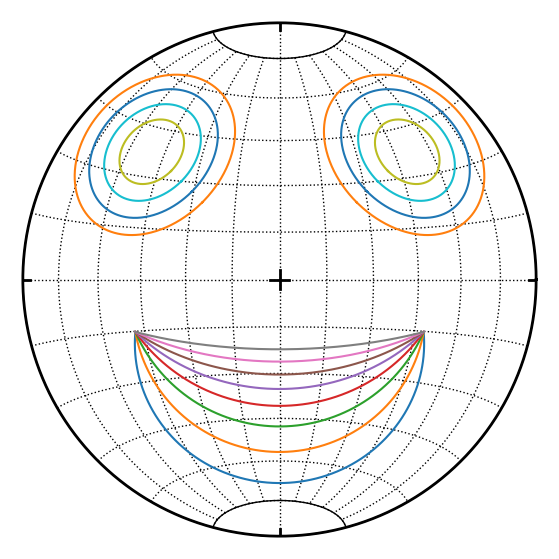

In [6]:
s.show()

## Some tricks

Double cross products are allowed but not easy to understand.

For example ``p**l**p`` is interpreted as ``p**(l**p)``: a) ``l**p`` is plane defined by ``l`` and ``p`` normal b) intersection of this plane and ``p`` is calculated

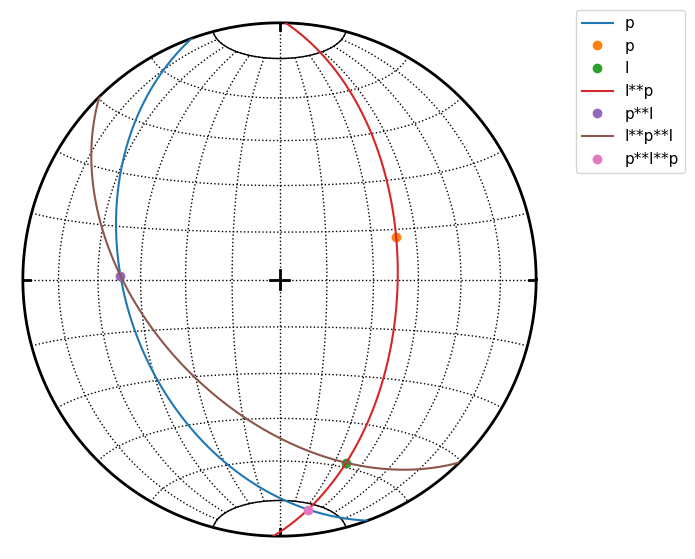

In [7]:
p = fol(250,40)
l = lin(160,25)
s = StereoNet()
s.great_circle(p, label='p')
s.pole(p, label='p')
s.line(l, label='l')
s.great_circle(l**p, label='l**p')
s.line(p**l, label='p**l')
s.great_circle(l**p**l, label='l**p**l')
s.line(p**l**p, label='p**l**p')
s.show()

``Pair`` class could be used to correct measurements of planar linear features which should spatialy overlap

In [8]:
pl = pair(250, 40, 160, 25)
pl.misfit

18.889520432245405

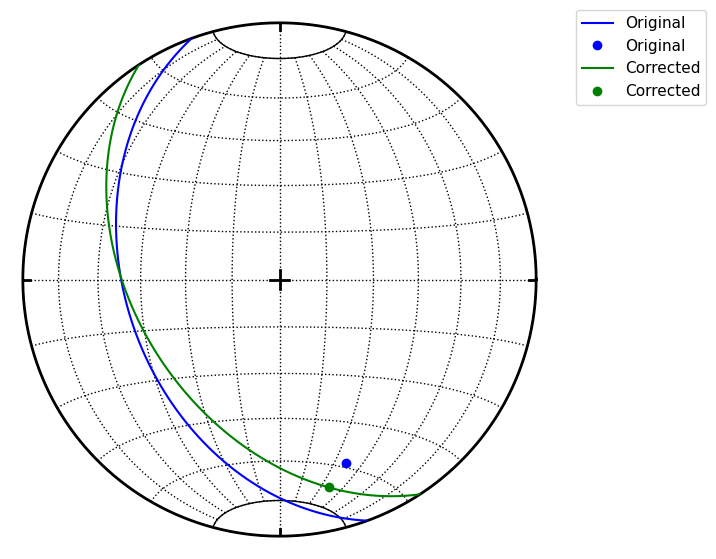

In [9]:
s = StereoNet()
s.great_circle(fol(250, 40), color='b', label='Original')
s.line(lin(160, 25), color='b', label='Original')
s.great_circle(pl.fol, color='g', label='Corrected')
s.line(pl.lin, color='g', label='Corrected')
s.show()

``StereoNet`` has method ``arrow`` to draw arrow. Here is example of Hoeppner plot for variable fault orientation within given stress field

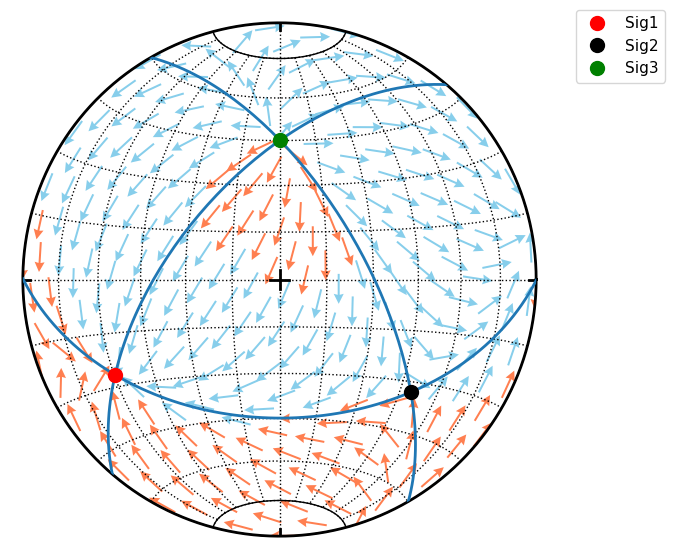

In [10]:
R = defgrad.from_pair(pair(180, 45, 240, 27))
S = stress([[-8, 0, 0],[0, -5, 0],[0, 0, -1]]).transform(R)
d = vecset.uniform_gss(n=600)
d = d[~d.is_upper()]
s = StereoNet()
s.great_circle(*S.eigenfols, lw=2)
s.line(S.eigenlins[0], ms=10, color='red', label='Sig1')
s.line(S.eigenlins[1], ms=10, color='k', label='Sig2')
s.line(S.eigenlins[2], ms=10, color='green', label='Sig3')
for n in d:
    f = S.fault(n)
    if f.sense == 1:
        s.arrow(f.fvec, f.lvec, sense=f.sense, color='coral')
    else:
        s.arrow(f.fvec, f.lvec, sense=f.sense, color='skyblue')
s.show()

## Cluster class
``Cluster`` class provide access to **scipy** hierarchical clustering. Distance matrix is calculated as mutual angles of features within Group keeping axial and/or vectorial nature in mind. ``Cluster.explain`` method allows to explore explained variance versus number of clusters relation. Actual cluster is done by ``Cluster.cluster`` method, using distance or maxclust criterion. Using of ``Cluster`` is explained in following example. We generate some data and plot dendrogram

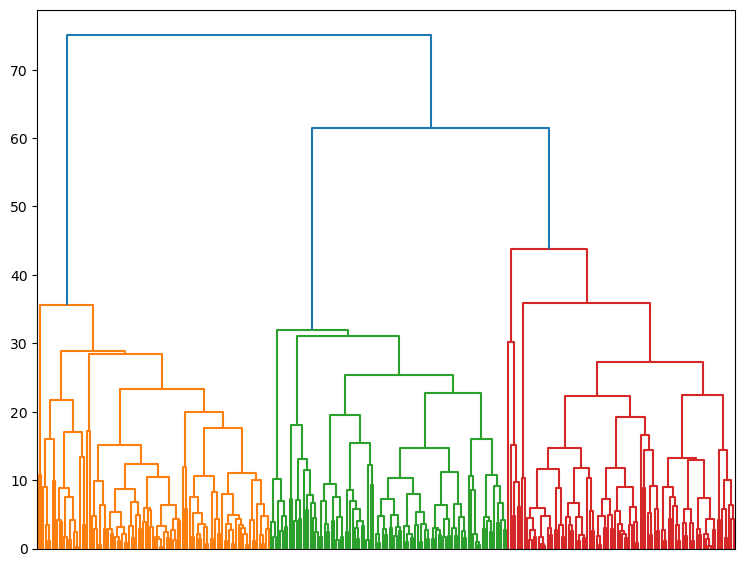

In [11]:
g1 = linset.random_fisher(position=lin(45,30))
g2 = linset.random_fisher(position=lin(320,56))
g3 = linset.random_fisher(position=lin(150,40))
g = g1 + g2 + g3
cl = cluster(g)
cl.dendrogram(no_labels=True)

Now we can explore evolution of within-groups variance versus number of clusters on Elbow plot (Note change in slope for three clusters)

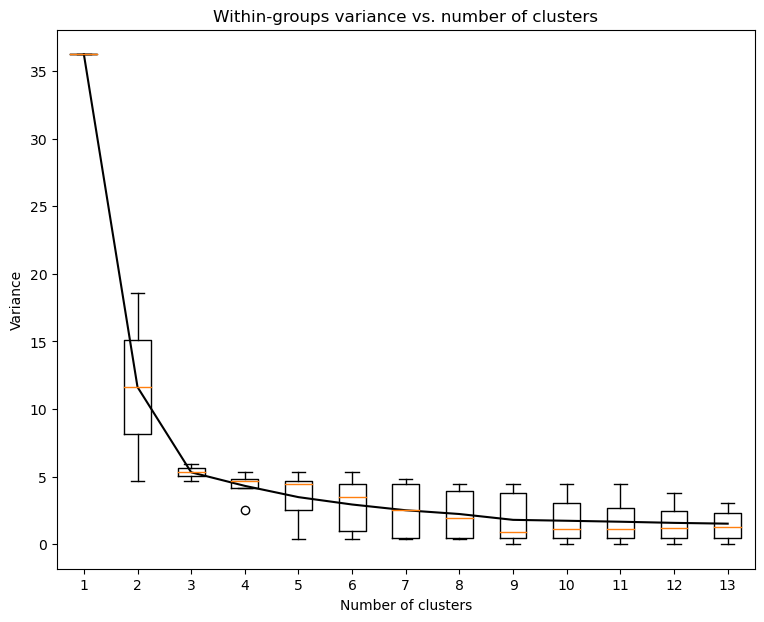

In [12]:
cl.elbow()

Finally we can do clustering and plot created clusters

In [13]:
cl.cluster(maxclust=3)
cl.R.data  # Restored centres of clusters

(L:150/38, L:42/32, L:319/55)

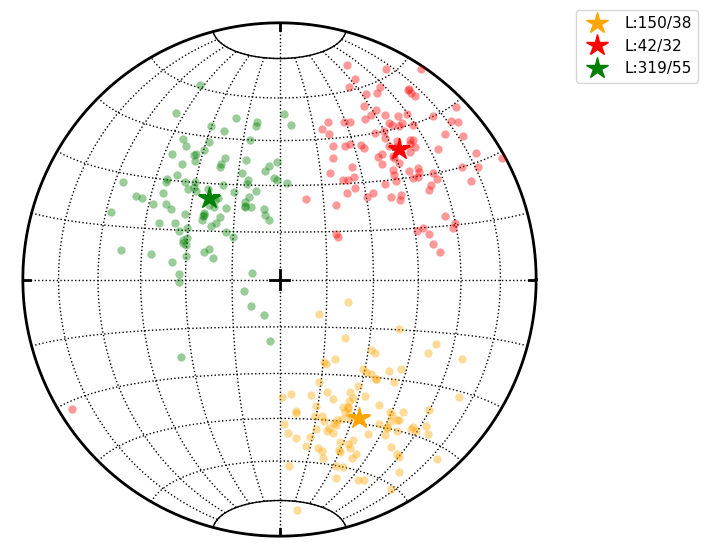

In [14]:
s = StereoNet()
for gid, color in zip(range(3), ['orange', 'red', 'green']):
    s.line(cl.groups[gid], color=color, alpha=0.4, mec='none')
    s.line(cl.R[gid], ms=16, color=color, marker='*', label=True)
s.show()